<a href="https://colab.research.google.com/github/MuhammadShaheer-khan/Forecasting-with-fbprophet/blob/main/Packages_%2B_goog_predictions_by_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [3]:
!pip install ta

  Created wheel for ta: filename=ta-0.6.1-cp36-none-any.whl size=27338 sha256=77604f48fba170a1b59c1887f7c039640e868a80844dcbb0c3ed40fe6bab2143
  Stored in directory: /root/.cache/pip/wheels/1e/f0/60/7ff1d2f1b55f4bb49c92740f01da7b0a33c60b6573a5909831
Successfully built ta


In [4]:
!pip install keras

In [5]:
!pip install fbprophet

In [6]:
import pandas_datareader.data as reader
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [8]:
end = dt.datetime.now()
start = dt.datetime(end.year -20, end.month, end.day)

In [9]:
start

datetime.datetime(2000, 11, 20, 0, 0)

In [10]:
df = reader.get_data_yahoo("GOOG",start,end)

In [11]:
print(df.head())

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2004-08-19  51.835709  47.800831  49.813286  49.982655  44871300.0  49.982655
2004-08-20  54.336334  50.062355  50.316402  53.952770  22942800.0  53.952770
2004-08-23  56.528118  54.321388  55.168217  54.495735  18342800.0  54.495735
2004-08-24  55.591629  51.591621  55.412300  52.239193  15319700.0  52.239193
2004-08-25  53.798351  51.746044  52.284027  52.802086   9232100.0  52.802086


In [12]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-13,1781.040039,1744.550049,1757.630005,1777.020020,1499900.0,1777.020020
2020-11-16,1799.069946,1767.689941,1771.699951,1781.380005,1246800.0,1781.380005
2020-11-17,1785.000000,1767.000000,1776.939941,1770.150024,1147100.0,1770.150024
2020-11-18,1773.469971,1746.140015,1765.229980,1746.780029,1173500.0,1746.780029
2020-11-19,1769.589966,1737.005005,1738.380005,1763.920044,1247900.0,1763.920044


In [13]:
from fbprophet import Prophet

In [14]:
model = Prophet()

In [15]:
df = df.reset_index()

In [17]:
df[["ds", "y"]] = df[["Date", "Adj Close"]]

In [18]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = model.make_future_dataframe(periods=365)

In [20]:
forecast = model.predict(future)

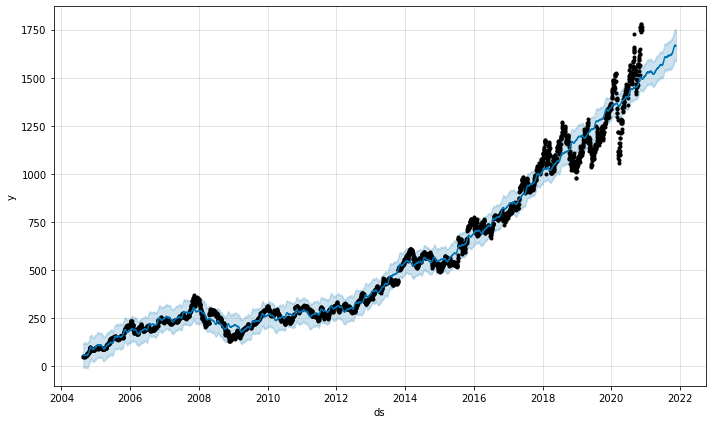

In [21]:
model.plot(forecast)
plt.show()